In [134]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram,array_to_latex
import numpy as np
from random import random 
qasm_s=Aer.get_backend("qasm_simulator")
u_s=Aer.get_backend("unitary_simulator")
ss=Aer.get_backend("statevector_simulator")
pi=np.math.pi
def binar(x,n):
    x=bin(x)
    return (n+2-len(x))*"0"+x[2:]

def normalizer(x):
    return x/np.linalg.norm(x)

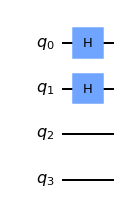

00 0
01 1
10 2
11 3


In [9]:
qc=QuantumCircuit(4)
qc.h((0,1))
display(qc.draw("mpl"))

sv=np.asarray(execute(qc,ss).result().get_statevector())


nhg=np.zeros((2**4,2**2))
for i in sv.nonzero()[0]:
    nhg[i][int(binar(i,4)[-2:],2)]=1
sv=normalizer(np.dot(sv,nhg))
for i in sv.nonzero()[0]:
    print(binar(i,2),i)

In [34]:
random()

0.9323273622051539

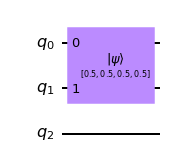

In [11]:
qc=QuantumCircuit(3)

qc.initialize(sv,(0,1))
display(qc.draw("mpl"))


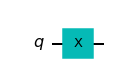

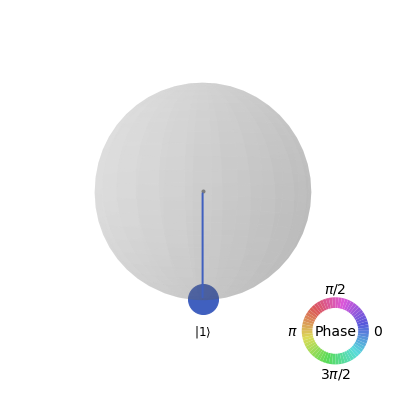

<IPython.core.display.Latex object>

In [41]:
inf="010110111100110"





qc=QuantumCircuit(1)



def alice(info):
    if info=="1":
        qc.h(0)
        qc.p(np.math.pi,0)
    else: 
        qc.x(0)


alice("0")
        
display(qc.draw("mpl"))
sv=np.asarray(execute(qc,ss).result().get_statevector())
display(plot_state_qsphere(sv))
display(array_to_latex(sv))

Alice                       ----->           Bob
Whether Z basis, Phase             

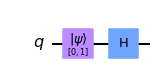

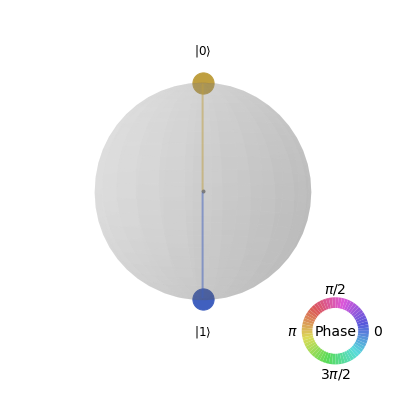

<IPython.core.display.Latex object>

In [50]:
def bob(_):
    qc=QuantumCircuit(1)
    qc.initialize(sv,0)

    if _<.5:
        print(0)
        qc.h(0)
    else:
        print(1)


display(qc.draw("mpl"))
sv=np.asarray(execute(qc,ss).result().get_statevector())
display(plot_state_qsphere(sv))
display(array_to_latex(sv))

In [262]:
cert="100111001"


def alice(info):
    if not (info=="1" or info=="0"):
        raise ValueError("Only bits can be sent")
    
    info=int(info)
    qc=QuantumCircuit(1)
    
    if info:
        qc.initialize(((1/2)**.5,(1/2)**.5),0)
    else:
        qc.initialize((0,1),0)

        
    return np.asarray(execute(qc,ss).result().get_statevector())


def bob(state):
    qc=QuantumCircuit(1,1)
    if not len(state)==2:
        raise ArgumentError("Only 1 qubit consisting states can be analyzed")
    qc.initialize(state,0)
    _=random()
    _=0
    
    if _>.5:
        __=True
    else:
        __=False

    if __:
        qc.h(0)
        qc.x(0)

    qc.measure(0,0)
    return execute(qc,qasm_s,shots=1000).result().get_counts()


accumulation=0
eve=False
for i in range(10):
    if random()>.5:
        _="1"
    else:
        _="0"
    print(_)
    
    __=bob((0,1))
    try:
        if __["1"]==1000:
            if _=="1":
                accumulation+=1
        elif __["0"]==1000:
            eve=True
        else:
            if _=="0":
                accumulation+=1
    except:
        eve=True

    
print("Accumulation",accumulation)

0
0
1
1
1
1
0
1
0
1
Accumulation 6


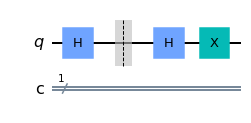

0 1


<IPython.core.display.Latex object>

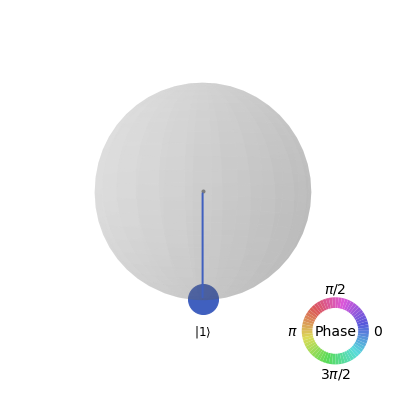

In [275]:
qc=QuantumCircuit(1,1)

_,__=random(),random()

if _>.5:
    _=1
else:
    _=0

if __>.5:
    __=1
else:
    __=0


if _:
    qc.h(0)
else:
    qc.h(0)

qc.barrier()
    

if __:
    qc.h(0)
    qc.x(0)

display(qc.draw("mpl"))

sv=np.asarray(execute(qc,ss).result().get_statevector())
print(_,__)
display(array_to_latex(sv))
display(plot_state_qsphere(sv))





In [390]:
accumulation=0
eve=False
for i in range(10):
    qc=QuantumCircuit(1,1)
    
    _,__=1,random()
    
    if _>.5:
        _=1
    else:
        _=0

    if __>.5:
        __=1
    else:
        __=0


    if _:
        qc.h(0)
    else:
        qc.h(0)

    qc.barrier()
    
    #qc.measure(0,0)
    

    if __:
        qc.h(0)
        qc.x(0)

    qc.measure(0,0)


    counts=execute(qc,qasm_s,shots=1000).result().get_counts()

    _c=tuple(counts)
    if len(_c)==2:

        sent=0
    else:
        if _c[0]=="1":
            sent=1
        else:
            eve=True
            
            

    if _==sent:
        accumulation+=1
    
    cor=accumulation/10
print("Correlation:",cor)




Correlation: 0.4


In [328]:
eve

False

In [393]:
acc=0
for i in range(100):
    accumulation=0
    eve=False
    for i in range(10):
        qc=QuantumCircuit(1,1)

        _,__=1,random()

        if _>.5:
            _=1
        else:
            _=0

        if __>.5:
            __=1
        else:
            __=0


        if _:
            qc.h(0)
        else:
            qc.h(0)

        qc.barrier()

        qc.measure(0,0)


        if __:
            qc.h(0)
            qc.x(0)

        qc.measure(0,0)


        counts=execute(qc,qasm_s,shots=1000).result().get_counts()

        _c=tuple(counts)
        if len(_c)==2:

            sent=0
        else:
            if _c[0]=="1":
                sent=1
            else:
                eve=True



        if _==sent:
            accumulation+=1

        acc+=accumulation/10

print("Correlation:",acc/1000)


Correlation: 0.0
